In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
data=pd.read_csv("C:\\Users\\admin\\Downloads\\Loan_default.csv\\Loan_default.csv")

In [5]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [7]:
data=data.drop(columns=['LoanID'])

In [9]:
data['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [11]:
data['HasMortgage'].value_counts()

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

In [13]:
data['HasDependents'].value_counts()

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

In [15]:
data['HasCoSigner'].value_counts()

HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64

In [17]:
label=LabelEncoder()

In [19]:
data['HasMortgage']=label.fit_transform(data['HasMortgage'])

In [21]:
data['HasDependents']=label.fit_transform(data['HasDependents'])

In [23]:
data['HasCoSigner']=label.fit_transform(data['HasCoSigner'])

In [25]:
data['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [27]:
data['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [29]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0


In [31]:
ordinal_encoder = OrdinalEncoder(categories=[["High School", "Bachelor's", "Master's", "PhD"]])

In [33]:
data['Education']=ordinal_encoder.fit_transform(data[['Education']])

In [35]:
ordinal_encoder2=OrdinalEncoder(categories=[["Unemployed","Part-time","Self-employed","Full-time"]])
data['EmploymentType']=ordinal_encoder2.fit_transform(data[['EmploymentType']])

In [37]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,Divorced,0,1,Auto,0,0


In [39]:
encoder=OneHotEncoder(sparse_output=False)

In [41]:
new_loan=encoder.fit(data[['LoanPurpose']])

In [43]:
new_loan

OneHotEncoder(sparse_output=False)

In [45]:
feature_names = encoder.get_feature_names_out(input_features=['LoanPurpose'])
feature_names

array(['LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype=object)

In [47]:
final_loan=encoder.fit_transform(data[['LoanPurpose']])

In [49]:
final_loan_df=pd.DataFrame(final_loan,columns=feature_names)

In [51]:
new_martial=encoder.fit(data[['MaritalStatus']])

In [53]:
new_martial

OneHotEncoder(sparse_output=False)

In [55]:
features=encoder.get_feature_names_out(input_features=['MaritalStatus'])

In [57]:
features

array(['MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'], dtype=object)

In [59]:
new_marraige=encoder.fit_transform(data[['MaritalStatus']])
new_marraige

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [61]:
marraige_df=pd.DataFrame(new_marraige,columns=features)
marraige_df.head()

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [63]:
new_data=pd.concat([data,marraige_df,final_loan_df],axis=1)

In [65]:
new_data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasCoSigner,Default,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,...,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,...,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,...,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,...,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,...,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [67]:
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
from sklearn.preprocessing import StandardScaler

In [81]:
new_data=new_data.drop(columns=['LoanTerm','DTIRatio'])

In [95]:
y=new_data['Default']

In [77]:
new_data=new_data.drop(columns=['LoanPurpose','MaritalStatus'])

In [83]:
new_data.corr()['Default']

Age                      -0.167783
Income                   -0.099119
LoanAmount                0.086659
CreditScore              -0.034166
MonthsEmployed           -0.097374
NumCreditLines            0.028330
InterestRate              0.131273
Education                -0.028282
EmploymentType           -0.044534
HasMortgage              -0.022856
HasDependents            -0.034678
HasCoSigner              -0.039109
Default                   1.000000
MaritalStatus_Divorced    0.020290
MaritalStatus_Married    -0.026875
MaritalStatus_Single      0.006607
LoanPurpose_Auto          0.004181
LoanPurpose_Business      0.011162
LoanPurpose_Education     0.003512
LoanPurpose_Home         -0.021564
LoanPurpose_Other         0.002737
Name: Default, dtype: float64

In [87]:
x=new_data.drop(columns=['Default'])

In [89]:
scaler=StandardScaler()

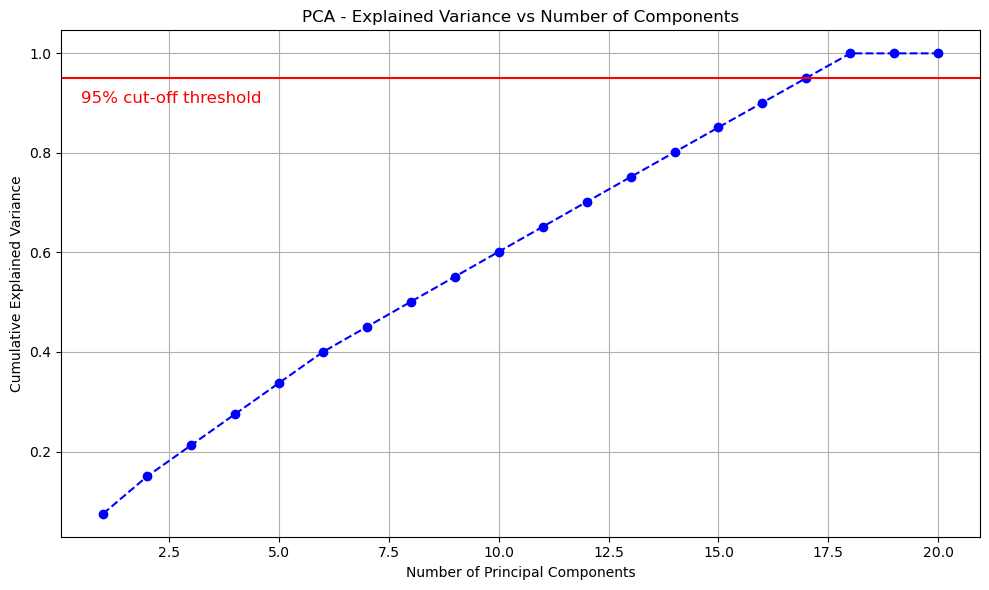

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.90, '95% cut-off threshold', color = 'red', fontsize=12)
plt.tight_layout()
plt.show()


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [99]:
x_trained=scaler.fit_transform(x_train)

In [101]:
x_tested=scaler.transform(x_test)

In [103]:
forest=RandomForestClassifier(n_estimators=100)

In [105]:
forest.fit(x_trained,y_train)

RandomForestClassifier()

In [106]:
y_predict=forest.predict(x_tested)

In [107]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8864695515958488

In [117]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67783
           1       0.60      0.04      0.08      8822

    accuracy                           0.89     76605
   macro avg       0.75      0.52      0.51     76605
weighted avg       0.86      0.89      0.84     76605



In [119]:
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(x)

In [125]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_pca,y,test_size=0.4)

In [127]:
x_train2=scaler.fit_transform(x_train2)
x_test2=scaler.transform(x_test2)

In [ ]:
rf_pca=RandomForestClassifier(n_estimators=100)
rf_pca.fit(x_train2,y_train2)
y_rf_pca=rf_pca.predict(x_test2)

In [133]:
accuracy_score(y_test2,y_rf_pca)

0.8747197446616866

In [135]:
print(classification_report(y_test2,y_rf_pca))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     90219
           1       0.28      0.05      0.08     11920

    accuracy                           0.87    102139
   macro avg       0.58      0.51      0.51    102139
weighted avg       0.82      0.87      0.83    102139



In [137]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=1000000)
lg.fit(x_trained,y_train)
y_lg=lg.predict(x_tested)
print(accuracy_score(y_test,y_lg))
print(classification_report(y_test,y_lg))

0.8862215260100516
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67783
           1       0.60      0.04      0.07      8822

    accuracy                           0.89     76605
   macro avg       0.74      0.52      0.50     76605
weighted avg       0.85      0.89      0.84     76605



In [143]:
lg2=LogisticRegression(max_iter=10000)
lg2.fit(x_train2,y_train2)
y_lg2=lg2.predict(x_test2)
print(accuracy_score(y_test2,y_lg2))
print(classification_report(y_test2,y_lg2))

0.8832962923075417
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     90219
           1       0.00      0.00      0.00     11920

    accuracy                           0.88    102139
   macro avg       0.44      0.50      0.47    102139
weighted avg       0.78      0.88      0.83    102139



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [147]:
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='mlogloss',  # For multi-class classification
    random_state=42
)
model.fit(x_train2, y_train2)
y_pred = model.predict(x_test2)
print("Accuracy:", accuracy_score(y_test2, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred))
print("Classification Report:\n", classification_report(y_test2, y_pred))


C:\Users\admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:44:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8835900096926738
Confusion Matrix:
 [[90079   140]
 [11750   170]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     90219
           1       0.55      0.01      0.03     11920

    accuracy                           0.88    102139
   macro avg       0.72      0.51      0.48    102139
weighted avg       0.85      0.88      0.83    102139



In [149]:
model1 = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='mlogloss',  # For multi-class classification
    random_state=42
)
model1.fit(x_trained, y_train)
y_pred = model1.predict(x_tested)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:45:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8866653612688467
Confusion Matrix:
 [[67428   355]
 [ 8327   495]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     67783
           1       0.58      0.06      0.10      8822

    accuracy                           0.89     76605
   macro avg       0.74      0.53      0.52     76605
weighted avg       0.85      0.89      0.84     76605



In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

meta_model = LogisticRegression(max_iter=1000, random_state=42)

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {stacking_clf.score(X_test, y_test):.4f}")

Confusion Matrix:
[[44712   427]
 [ 5372   559]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.57      0.09      0.16      5931

    accuracy                           0.89     51070
   macro avg       0.73      0.54      0.55     51070
weighted avg       0.85      0.89      0.85     51070

Accuracy: 0.8864
